grid shape: torch.Size([1, 197, 233, 189, 3])
image shape torch.Size([1, 1, 197, 233, 189])


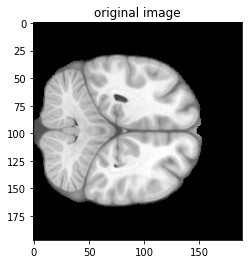

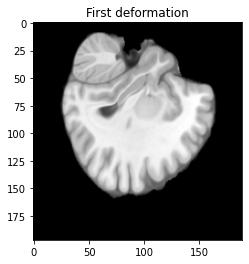

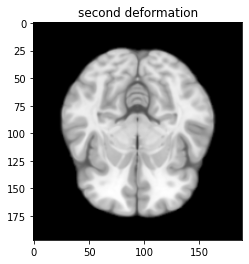

No handles with labels found to put in legend.


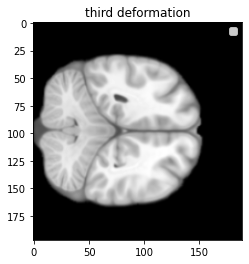

In [2]:
import matplotlib.pyplot as plt
import torch
import nibabel as nib
import kornia.utils.grid as Kg
MNI_img = nib.load("/home/matthis/datasets/skull_stripped.nii.gz").get_fdata()
MNI_img = (MNI_img - MNI_img.min()) / (MNI_img.max() - MNI_img.min())
MNI_img = torch.from_numpy(MNI_img).type(torch.FloatTensor).unsqueeze(0).unsqueeze(0)

_,_,h,w,d = MNI_img.shape

grid = Kg.create_meshgrid3d(h,w,d, normalized_coordinates=False) #Je mets normalized=False car =True ne marche pas
mult = torch.tensor((2 / (h - 1), 2 / (d - 1), 2 / (w - 1))).unsqueeze(0).unsqueeze(0)

grid = grid * mult - 1

print("grid shape:", grid.shape)
print("image shape", MNI_img.shape)
plt.imshow(MNI_img[0,0,:,80,:], cmap="gray")
plt.title("original image")
plt.show()
out = torch.nn.functional.grid_sample(MNI_img, grid, align_corners=True)
plt.imshow(out[0,0,:,80,:], cmap="gray")
plt.title("First deformation")
plt.show()
out = torch.nn.functional.grid_sample(out, grid, align_corners=True)
plt.imshow(out[0,0,:,80,:], cmap="gray")
plt.title("second deformation")
plt.show()
out = torch.nn.functional.grid_sample(out, grid, align_corners=True)
plt.imshow(out[0,0,:,80,:], cmap="gray")
plt.title("third deformation")
plt.show()

grid shape: torch.Size([1, 189, 233, 197, 3])
image shape torch.Size([1, 1, 197, 233, 189])


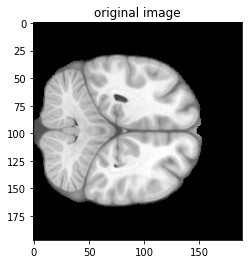

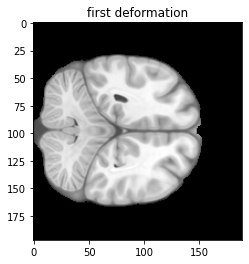

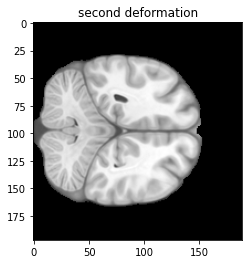

In [3]:
####Solution######

d1 = torch.linspace(0, d-1, d)
d2 = torch.linspace(0, w-1, w)
d3 = torch.linspace(0, h-1, h)
d1 = 2 * d1 / (d-1) -1
d2 = 2 * d2 / (w-1) -1
d3 = 2 * d3 / (h-1) -1
meshx, meshy, meshz = torch.meshgrid((d1, d2, d3))
grid = torch.stack((meshx, meshy, meshz), 3)
grid = grid.unsqueeze(0)  # add batch dim
print("grid shape:", grid.shape)
print("image shape", MNI_img.shape)
plt.imshow(MNI_img[0,0,:,80,:], cmap="gray")
plt.title("original image")
plt.show()
out = torch.nn.functional.grid_sample(MNI_img, grid, align_corners=True)
out = out.permute(0,1,4,3,2)
plt.imshow(out[0,0,:,80,:], cmap="gray")
plt.title("first deformation")
plt.show()
out = torch.nn.functional.grid_sample(out, grid, align_corners=True)
out = out.permute(0,1,4,3,2)
plt.imshow(out[0,0,:,80,:], cmap="gray")
plt.title("second deformation")
plt.show()
